# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [12]:
path = r'C:\Users\maxca\Part 6 Gun Violence'

In [13]:
df = pd.read_csv(os.path.join(path,'02 Data','Original Data','gun-violence-data_01-2013_03-2018.csv'))

### First look at the data

In [14]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [15]:
df.columns.values.tolist()

['incident_id',
 'date',
 'state',
 'city_or_county',
 'address',
 'n_killed',
 'n_injured',
 'incident_url',
 'source_url',
 'incident_url_fields_missing',
 'congressional_district',
 'gun_stolen',
 'gun_type',
 'incident_characteristics',
 'latitude',
 'location_description',
 'longitude',
 'n_guns_involved',
 'notes',
 'participant_age',
 'participant_age_group',
 'participant_gender',
 'participant_name',
 'participant_relationship',
 'participant_status',
 'participant_type',
 'sources',
 'state_house_district',
 'state_senate_district']

In [16]:
df.shape

(239677, 29)

## We're dropping the columns incident_url', 'source_url', 'gun_stolen','gun_type', 'incident_url_fields_missing' and 'sources', 'congressional_district',  'participant_type', 'participant_relationship', 'participant_status', 'state_senate_district', 'state_house_district', 'notes' because they are not relevent. And the 'participant_name' since it's PII.

In [17]:
df = df.drop(columns = ['incident_url','source_url','address', 'incident_url_fields_missing', 'participant_type', 'participant_relationship', 'participant_status', 'state_senate_district', 'state_house_district', 'congressional_district', 'gun_stolen','gun_type','sources','notes', 'participant_name'])

In [18]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female
1,460726,2013-01-01,California,Hawthorne,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male
2,478855,2013-01-01,Ohio,Lorain,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male
3,478925,2013-01-05,Colorado,Aurora,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male
4,478959,2013-01-07,North Carolina,Greensboro,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female


In [19]:
#Columns
df.columns.values.tolist()

['incident_id',
 'date',
 'state',
 'city_or_county',
 'n_killed',
 'n_injured',
 'incident_characteristics',
 'latitude',
 'location_description',
 'longitude',
 'n_guns_involved',
 'participant_age',
 'participant_age_group',
 'participant_gender']

In [20]:
#Checking for Data Types df
df.dtypes

incident_id                   int64
date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
incident_characteristics     object
latitude                    float64
location_description         object
longitude                   float64
n_guns_involved             float64
participant_age              object
participant_age_group        object
participant_gender           object
dtype: object

## Consistency checks

In [21]:
# Checking for missing values
print(df.isnull().sum())

incident_id                      0
date                             0
state                            0
city_or_county                   0
n_killed                         0
n_injured                        0
incident_characteristics       326
latitude                      7923
location_description        197588
longitude                     7923
n_guns_involved              99451
participant_age              92298
participant_age_group        42119
participant_gender           36362
dtype: int64


In [168]:
#Checking for duplicates
df[df.duplicated()]

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender


In [22]:
#Statistical Overview
df.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved
count,2.396770e+05,239677.000000,239677.000000,231754.000000,231754.000000,140226.000000
mean,5.593343e+05,0.252290,0.494007,37.546598,-89.338348,1.372442
std,2.931287e+05,0.521779,0.729952,5.130763,14.359546,4.678202
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,1.000000
25%,3.085450e+05,0.000000,0.000000,33.903400,-94.158725,1.000000
50%,5.435870e+05,0.000000,0.000000,38.570600,-86.249600,1.000000
75%,8.172280e+05,0.000000,1.000000,41.437375,-80.048625,1.000000
max,1.083472e+06,50.000000,53.000000,71.336800,97.433100,400.000000


### Imputing Mean for missing values

In [170]:
# Numerical Columns
def impute_data(df):
    
    for col in df.select_dtypes(include=['int', 'float']):
        if df[col].isnull().sum() > 0:  
           df.loc[df[col].isnull(), col] = df[col].mean() 
    return df    

# Apply the imputation function
df = impute_data(df)

In [171]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female
1,460726,2013-01-01,California,Hawthorne,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male
2,478855,2013-01-01,Ohio,Lorain,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male
3,478925,2013-01-05,Colorado,Aurora,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male
4,478959,2013-01-07,North Carolina,Greensboro,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female


In [172]:
# Checking for missing values
print(df.isnull().sum())

incident_id                      0
date                             0
state                            0
city_or_county                   0
n_killed                         0
n_injured                        0
incident_characteristics       326
latitude                         0
location_description        197588
longitude                        0
n_guns_involved                  0
participant_age              92298
participant_age_group        42119
participant_gender           36362
dtype: int64


In [173]:
#Imputing Mean for 'participant_age'
def impute_mode_for_column(df, column_name):
    if df[column_name].dtype == 'object' and df[column_name].isnull().any():
        mode_value = df[column_name].mode()[0]
        df[column_name].fillna(mode_value, inplace=True)

# Impute mode for 'participant_age' column
impute_mode_for_column(df, 'participant_age')

In [174]:
#Imputing Mean for 'participant_age_group'
def impute_mode_for_column(df, column_name):
    if df[column_name].dtype == 'object' and df[column_name].isnull().any():
        mode_value = df[column_name].mode()[0]
        df[column_name].fillna(mode_value, inplace=True)

# Impute mode for 'participant_age_group' column
impute_mode_for_column(df, 'participant_age_group')

In [175]:
#Imputing Mean for 'participant_gender'
def impute_mode_for_column(df, column_name):
    if df[column_name].dtype == 'object' and df[column_name].isnull().any():
        mode_value = df[column_name].mode()[0]
        df[column_name].fillna(mode_value, inplace=True)

# Impute mode for 'participant_age_group' column
impute_mode_for_column(df, 'participant_gender')

In [176]:
# Checking for missing values
print(df.isnull().sum())

incident_id                      0
date                             0
state                            0
city_or_county                   0
n_killed                         0
n_injured                        0
incident_characteristics       326
latitude                         0
location_description        197588
longitude                        0
n_guns_involved                  0
participant_age                  0
participant_age_group            0
participant_gender               0
dtype: int64


In [177]:
# Final shape:
df.shape

(239677, 14)

In [178]:
# Final Descriptive Statistics
df.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved
count,2.396770e+05,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,5.593343e+05,0.252290,0.494007,37.546598,-89.338348,1.372442
std,2.931287e+05,0.521779,0.729952,5.045246,14.120208,3.578322
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,1.000000
25%,3.085450e+05,0.000000,0.000000,33.985200,-93.600900,1.000000
50%,5.435870e+05,0.000000,0.000000,38.181800,-86.767400,1.000000
75%,8.172280e+05,0.000000,1.000000,41.285100,-80.136700,1.372442
max,1.083472e+06,50.000000,53.000000,71.336800,97.433100,400.000000


<Axes: xlabel='n_guns_involved', ylabel='n_guns_involved'>

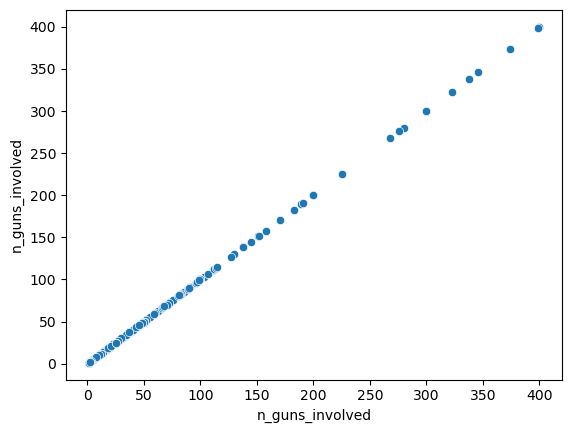

In [179]:
# There seems to be at least one outlier in n_guns_involved:
sns.scatterplot(x = 'n_guns_involved', y = 'n_guns_involved',data = df)

In [180]:
df_sorted = df.sort_values(by='n_guns_involved', ascending=False)

In [182]:
df_sorted.head(20)

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender
98804,449889,2015-11-12,California,Clovis,0,0,Non-Shooting Incident||ATF/LE Confiscation/Rai...,36.8141,NaN,-119.6490,400.0,0::59,0::Adult 18+,0::Male
69524,338106,2015-05-11,California,Los Angeles,0,0,Non-Shooting Incident||Gun buy back action,33.9884,NaN,-118.4520,400.0,0::24,0::Adult 18+,0::Male
95847,437442,2015-10-24,California,San Diego,0,0,Non-Shooting Incident||Gun buy back action,32.7185,NaN,-117.1620,400.0,0::24,0::Adult 18+,0::Male
85777,398932,2015-08-20,Florida,Orlando,0,0,Non-Shooting Incident||Gun buy back action,28.5421,NaN,-81.3751,400.0,0::24,0::Adult 18+,0::Male
104383,471064,2015-12-22,Maryland,Baltimore,0,0,Non-Shooting Incident||ATF/LE Confiscation/Rai...,39.2876,Federal Courthouse,-76.6163,399.0,0::24,0::Adult 18+,0::Male
85795,398933,2015-08-20,Florida,Orlando,0,0,Non-Shooting Incident||Gun buy back action,28.5421,NaN,-81.3751,374.0,0::24,0::Adult 18+,0::Male
69527,338113,2015-05-11,California,Van Nuys,0,0,Gun buy back action,34.2010,NaN,-118.4530,346.0,0::24,0::Adult 18+,0::Male
76975,365306,2015-06-27,Florida,Tampa,0,0,Non-Shooting Incident||Gun buy back action,27.9506,Tampa Police Department,-82.4572,338.0,0::24,0::Adult 18+,0::Male
99968,451099,2015-11-21,Maryland,Upper Marlboro,0,0,Non-Shooting Incident||Gun buy back action,38.8854,First Baptist Church of Glenarden,-76.7828,323.0,0::24,0::Adult 18+,0::Male
91849,421931,2015-09-26,California,Fontana,0,0,Non-Shooting Incident||ATF/LE Confiscation/Rai...,34.1064,NaN,-117.5130,300.0,0::57,0::Adult 18+,0::Male


### These incidents don't interfere with most of our analysis and are still gun violence related, so we keep them in.

### Exporting cleaned df

In [184]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_gunviolence_cleand.csv'))